# Multivariat Analysis

### Notes from sources

#### 2016 Submission
- correlation matrix as input for FA, CA and MDS
- Factor Analysis
    - Apply PCA and varmax rotation as extraction algorithm
    - final factor solution was determined by using Kaiser's criterion and Scree test
    - only conisder loadings above 0.4 (DiSteano)
    
    
#### 2012 DiStefano
- corr matrix as input
- FA, CA, MDS
- FA (Mccain 1990)
    - PCA as extraction method
    - varimax rotation of extracted factors to interpret
    - number of factors through kaiser and Scree
- MDS (Kruskal and Wish, 1978)
    - mds graph as robustness check for FA
    - better interpret the realtionships between factors
    - Kruskals Stress test and R-squared to check for level of fit
 
#### 1990 McCain
- corr matrix as input for Multivariate Analysis (PCA, CA, MDS)
- MDS and Cluster: need both same similarity matrix (not correlation)! 1-corr
- MDS 
    - Kruskal/R² as stopping criterion
    - 3d often only adds little explanation power while making interpretation way more complex
- Factor Analysis
    - complement MDS and Cluster
    - only vars with loading >=0.7 are useful to explain factor
    - only loading above 0.5/0.4 shall be reported
    - usually PCA and varmax rotation
        - produces uncorrelated factors
        - with most vars with high loading on only one var
        - number of factors - eigenvalue > 1 (Kaiser Criterion)
        - intercorrelation between factors reveals subject-related linkage above the Author level (keywordlevel)
        - if factors are  indeppended their subject have not been yet coocured
        

### Import data and packages

In [11]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd

In [12]:
# load data
with open('dataframe_papers.pickle', 'rb') as f:
    df = pickle.load(f)
    
# define ariable types automatically (integer, string etc. ...)
df = df.infer_objects()

# reset index (frgment from the script 2)
df.reset_index(inplace=True,drop=True)

# introduce variable in date time format
df["dt_year"] = pd.to_datetime(df["year"], format="%Y")

In [13]:
df.head()

,da,unique-id,web-of-science-index,doc-delivery-number,journal-iso,usage-count-since-2013,usage-count-last-180-days,times-cited,number-of-cited-references,orcid-numbers,...,czech,hungary,italy,lisbon,portugal,prague,romania,rome,vatican,dt_year
0,2022-07-25,WOS:A1997YF94400004,Science Citation Index Expanded (SCI-EXPANDED),YF944,Mineral. Mag.,3,0,34,41,NaN,...,0,0,1,0,0,0,0,1,0,1997-01-01
1,2022-07-25,WOS:000278865400001,Arts &amp; Humanities Citation Index (A&amp;HCI),611ZW,Hist. Polit. Thought,1,0,14,53,NaN,...,0,0,1,0,0,0,0,1,0,2010-01-01
2,2022-07-25,WOS:000265439800025,Science Citation Index Expanded (SCI-EXPANDED),436TU,Aquat. Ecol.,31,0,25,45,"Fanelli, Giuliano/0000-0002-3143-1212",...,0,0,1,0,0,0,0,1,0,2009-01-01
3,2022-07-25,WOS:000245709800019,Science Citation Index Expanded (SCI-EXPANDED),157HP,Vet. Parasitol.,29,3,110,41,"Vadlejch, Jaroslav/0000-0002-5958-7606\nPekar,...",...,1,0,0,0,0,1,0,0,0,2007-01-01
4,2022-07-25,WOS:000600652300243,Emerging Sources Citation Index (ESCI),PH8JS,Data Brief,4,1,0,6,"de Almeida, Ana Maria/0000-0001-9519-4634\nNun...",...,0,0,0,1,1,0,0,0,0,2020-01-01


### Journal Filter

For the orginial work the Journal filter was based on the ranking of a certain journal. In this explanary application we use the number of papers from the dataset that where published in a journal. 
Scenario 2 filters for the top 100 journals with ragards to the number of papers from the dataset and scenario 3 for the top 50.

In [14]:
journals_scenario_2 = [i[0] for i in Counter(df.journal).most_common()][:100]
journals_scenario_3 = [i[0] for i in Counter(df.journal).most_common()][:50]

In [15]:
df["journal"] = df["journal"].str.upper()

In [16]:
df_scenario2 = df[df["journal"].isin(journals_scenario_2)]
df_scenario3 = df[df["journal"].isin(journals_scenario_3)]

print(len(df),len(df_scenario2),len(df_scenario3))

257712 42297 27608


#### export data for dashapp

Different versions/amounts depending on the format of deployment.

In [17]:
df_dash_1 = df.drop(columns=['da', 'oa', 'unique-id', 'web-of-science-index', 'doc-delivery-number',
       'journal-iso', 'usage-count-since-2013', 'usage-count-last-180-days', 'number-of-cited-references', 'funding-text',
       'funding-acknowledgement', 'orcid-numbers', 'researcherid-numbers',
       'author-email', 'web-of-science-categories', 'research-areas',
       'keywords-plus', 'keywords', 'eissn', 'issn', 'doi', 'affiliation',
       'language', 'type', 'address', 'publisher', 'abstract', 'month',
       'pages', 'number', 'volume', 'year',
       'ENTRYTYPE', 'ID', 'article-number', 'kw_cat', 'earlyaccessdate',
       'esi-hot-paper', 'esi-highly-cited-paper','series','booktitle','note','organization','isbn','editor','book-group-author'])

df_dash_2 = df_dash_1[df_dash_1["journal"].isin(journals_scenario_2)]
df_dash_3 = df_dash_1[df_dash_1["journal"].isin(journals_scenario_3)]

with open('data_dash_1.pickle', 'wb') as f:
    pickle.dump(df_dash_1, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('data_dash_2.pickle', 'wb') as f:
    pickle.dump(df_dash_2, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('data_dash_3.pickle', 'wb') as f:
    pickle.dump(df_dash_3, f, protocol=pickle.HIGHEST_PROTOCOL) 

### Prepare Data Function

In [18]:
# to change scenario replace df_scenario3 by 
# df_scenario2 or df_scenario1

def scenario_data(scenario):
    if scenario == 1:
        df_scenario = df.copy()
    elif scenario == 2:
        df_scenario = df_scenario2.copy()
    elif scenario == 3:
        df_scenario = df_scenario3.copy()
    else:
        return print("No valid scenario.")

    
    # sum up dummy vectors and drop the keywords occuring zero times

    occurence = df_scenario.iloc[:,50:-1]
    vec_drop = list(occurence.sum(axis=0) > 0)

    final_dummies = occurence.loc[:,vec_drop]

    # calc cooccurence matrix
    #diagonals become 0 - we want to ignore the cells for the same keywords
    df_cooc = final_dummies.T.dot(final_dummies)
    np.fill_diagonal(df_cooc.values,0)

    # get correlation based on that
    df_corr = df_cooc.corr(method="pearson")
    
    return df_cooc,df_corr



### Choose Scenario

In [19]:
s = 3
df_cooc,df_corr = scenario_data(s)

## save/export cooc and corr Matrix/df

with open(f"results/scenario_{s}/df_cooc.pickle","wb") as f:
    pickle.dump(df_cooc,f)
    

with open(f"results/scenario_{s}/df_corr.pickle","wb") as f:
    pickle.dump(df_corr,f)

In [20]:
df_corr

,bucharest,budapest,czech,hungary,italy,lisbon,portugal,prague,romania,rome,vatican
bucharest,1.000000,-0.005345,0.184158,0.640658,0.115723,-0.096852,-0.034835,-0.096706,-0.233835,-0.045613,-0.079433
budapest,-0.005345,1.000000,0.692828,-0.209470,0.065477,-0.127819,-0.066887,-0.112430,0.432139,-0.048779,-0.069810
czech,0.184158,0.692828,1.000000,-0.013542,-0.115414,-0.081884,0.064196,-0.227697,0.200925,0.317783,0.296826
hungary,0.640658,-0.209470,-0.013542,1.000000,-0.085599,-0.124042,0.041449,0.378626,-0.218475,0.277100,0.258234
italy,0.115723,0.065477,-0.115414,-0.085599,1.000000,0.247807,-0.298199,-0.039640,-0.182838,-0.220065,-0.216146
lisbon,-0.096852,-0.127819,-0.081884,-0.124042,0.247807,1.000000,-0.188232,-0.122350,-0.110340,-0.091857,-0.088651
portugal,-0.034835,-0.066887,0.064196,0.041449,-0.298199,-0.188232,1.000000,-0.049522,-0.019878,0.584480,0.583351
prague,-0.096706,-0.112430,-0.227697,0.378626,-0.039640,-0.122350,-0.049522,1.000000,-0.030603,-0.043627,-0.032820
romania,-0.233835,0.432139,0.200925,-0.218475,-0.182838,-0.110340,-0.019878,-0.030603,1.000000,0.234041,0.221235
rome,-0.045613,-0.048779,0.317783,0.277100,-0.220065,-0.091857,0.584480,-0.043627,0.234041,1.000000,0.999024


### Factor Analysis

#### Tests of Adequacy

##### Bartlett

In [21]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_cooc)
chi_square_value, p_value

(226.28775202777857, 4.6040653487704365e-23)

Significant p value. Data is suitable for PCA.
The Correlation Matrix is very much different from the identity matrix.

##### Kaiser-Meyer-Olkin

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(df_cooc)
print(kmo_model)

0.19866415265071177


C:\Users\Lion\anaconda3\envs\env_time\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


Very bad. Factor analysis not feasable. 
KMO should be > 0.6

#### Number of factors

Plotting two different criteria:
1. Screeplot /elbow criterion
    - here we look for the moment where the steepness becomes flat (factor 4)
2. Kaiser criterion
    - here we take all factors that have an eigenvalue of >1 (factor 8 included)
      



DiStefano, Kaiser's Criterion:
Kaiser’s criterion for factor extraction is accurate when there are less than 30
variables with communalities after extraction higher than 0.7 or more than 250
variables with communalities after extraction higher than 0.6. > no source given in DiStefano

([<matplotlib.axis.YTick at 0x2b496188190>], [Text(0, 0, '')])

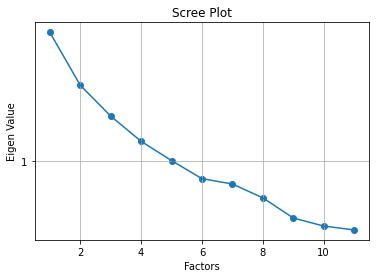

In [23]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


dataframe = df_corr

fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=dataframe.shape[1],
                   is_corr_matrix=True)
fa.fit(dataframe)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.yticks([1])
#> 8 Factors, when ever eigen value is over 1


#### Results factor analysis with 5 factors

In [24]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(dataframe)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

##### Communalities


In [25]:
communalities = pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities'])
print(communalities)

           Communalities
bucharest       0.995010
budapest        1.004408
czech           0.852972
hungary         1.003945
italy           0.696877
lisbon          0.998392
portugal        0.833071
prague          0.870506
romania         0.673968
rome            0.973144
vatican         0.966837


##### Loadings

In [26]:
fa = FactorAnalyzer(n_factors=9,rotation='varimax')
fa.fit(dataframe)
loadings = pd.DataFrame(fa.loadings_,index=dataframe.columns)
loadings.head()

,0,1,2,3,4,5,6,7,8
bucharest,-0.238007,0.928073,0.013701,0.169990,0.132196,-0.170525,-0.000702,-0.047329,0.0
budapest,-0.294331,-0.302363,0.827121,0.170644,0.214710,0.215499,0.032844,0.102195,0.0
czech,0.187435,-0.007835,0.940153,0.232770,0.077998,0.077662,0.075565,-0.067957,0.0
hungary,0.184503,0.865684,-0.249612,-0.358783,0.088048,-0.089839,0.049847,0.052771,0.0
italy,-0.600028,-0.059250,-0.177449,0.180623,-0.138158,-0.220106,-0.707424,0.002194,0.0


##### Variance

In [27]:
variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

,0,1,2,3,4,5,6,7,8
Variance,3.347611,2.005833,1.964285,1.155779,0.987646,0.811729,0.661182,0.023133,0.000000
Proportional Var,0.304328,0.182348,0.178571,0.105071,0.089786,0.073794,0.060107,0.002103,0.000000
Cumulative Var,0.304328,0.486677,0.665248,0.770319,0.860105,0.933898,0.994006,0.996109,0.996109


#### Export results factor analysis

In [28]:
# watch to change scenario

communalities.to_csv(f"results/scenario_{s}/factor_communalities.csv")    
loadings.to_csv(f"results/scenario_{s}/factor_loadings.csv")    
variance.to_csv(f"results/scenario_{s}/factor_variance.csv")    

## MDS 3D and 2D

In [29]:
from sklearn.manifold import MDS

M_dis = 1-df_corr

embedding = MDS(n_components=3,dissimilarity='precomputed', random_state=3)
X_transformed = embedding.fit_transform(M_dis)

# stress

stress = embedding.stress_
print(stress)

0.6055806327021203


In [30]:
stress1 = np.sqrt(stress / (0.5 * np.sum(M_dis.values**2)))
print("Kruskal's Stress :")
print("[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]")
print(stress1)
print("")

Kruskal's Stress :
[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]
0.10679481777775267



In [31]:
#export 

pd.DataFrame(X_transformed).to_csv(f"results/scenario_{s}/mds_coordinates.csv")

## Cluster


##### McCain 1990, p437

- the aim is not to find a optimal cluster number but to inform the discurs
- one simply uses the dendogram and argues from one cluster level and realtes to lower or higher levels where reasonable
- eventually try out results with different linkag method

##### Boyack & Klavans 2010

- different cluster method


#### DiStefano 2012

- cluster and factor where used, coherent
- only factor described cause it also give the factor loadings

-> use as many clusters as factors

In [32]:
import pandas as pd
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import scipy
import plotly.offline as pyo
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from sklearn_extra.cluster import KMedoids

### Compare AHC and KMedioids and find optimal cluster number

- define corresponding function returning the clustering for different k's to be used in 3.

In [33]:
## define functions that return the clusters per keyword for both algorithms
## input is the number of clusters k and the distance matrix

def hierachy_k(dist_M,k):
    '''
    input: dist_M n*n with 1-pearson values, k number of clusters
    output: cluster mapping
    '''
    
    condensed_diss = squareform(dist_M)
    linkage_M = linkage(condensed_diss, method="ward",metric="euclidean")
    
    ct = cut_tree(linkage_M,k)
    
    return ct


def kmedoids(dist_M,k):
    kmedoids = KMedoids(n_clusters=k, random_state=0, metric="precomputed").fit(dist_M)
    
    return kmedoids.labels_

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# loop through k 2 to 10 and claculated different scores
# randscore (compares if the method decide on similar clusters)
# mutual information score (adj) - decribees the amount of information we receives about one variable (clustering) by knowing the other

# silhouette score - how well apart and distinguished are the found clusters

randscores = []
mis = []
sil = []

for i in range(2,10): #try number of cluster
    agg = hierachy_k(M_dis,i)
    agg = [i[0] for i in agg]
    km = kmedoids(M_dis,i)

    randscores.append((i,adjusted_rand_score(agg,km)))
    mis.append((i,adjusted_mutual_info_score(agg,km)))
    
    sil_agg = silhouette_score(M_dis, labels=agg)
    sil_km = silhouette_score(M_dis, labels=km)
    sil_temp = [i,sil_agg,sil_km]
    sil.append(sil_temp)

In [35]:
rand_plot = pd.DataFrame(randscores, columns=["cluster","rand"])
mis_plot = pd.DataFrame(mis, columns=["cluster","mis"])

In [36]:
sil_plot = pd.DataFrame(sil, columns=["cluster","agg","km"])

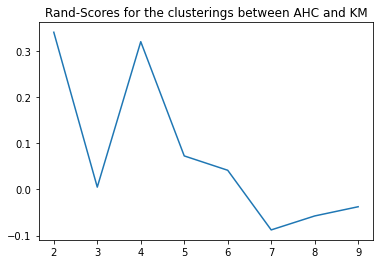

In [37]:
import matplotlib.pyplot as plt
plt.plot(rand_plot["cluster"],rand_plot["rand"])
plt.title("Rand-Scores for the clusterings between AHC and KM")
plt.savefig(f"results/scenario_{s}/rand.png")

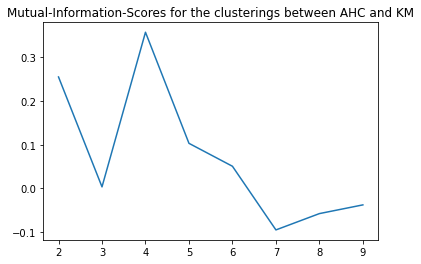

In [38]:
plt.plot(mis_plot["cluster"],mis_plot["mis"])
plt.title("Mutual-Information-Scores for the clusterings between AHC and KM")
plt.savefig(f"results/scenario_{s}/mis.png")

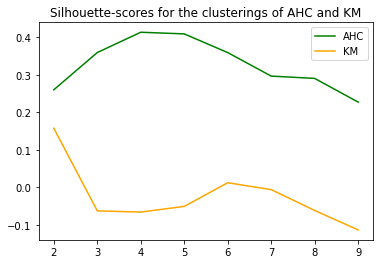

In [39]:
plt.plot(sil_plot["cluster"],sil_plot["agg"], c="green")
plt.plot(sil_plot["cluster"],sil_plot["km"], c="orange")
plt.legend({"AHC":"green","KM":"orange"})
plt.title("Silhouette-scores for the clusterings of AHC and KM")
plt.savefig(f"results/scenario_{s}/sil.png")
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
# set up this viz maybe

##### More indepth Silhouette score analysis

Plotting not just the overall average score but per data point per cluster.
The red line is the overall average. Ideally we would like to see a solution where for all cluster the majority of points is above the average.

For n_clusters = 2 The average silhouette_score is : 0.26016308874708666
For n_clusters = 3 The average silhouette_score is : 0.35959738327485047
For n_clusters = 4 The average silhouette_score is : 0.41376987070084126
For n_clusters = 5 The average silhouette_score is : 0.40936345411791863
For n_clusters = 6 The average silhouette_score is : 0.35947007242100476
For n_clusters = 7 The average silhouette_score is : 0.2966971428069929
For n_clusters = 8 The average silhouette_score is : 0.290527896600575
For n_clusters = 9 The average silhouette_score is : 0.22726505375787764


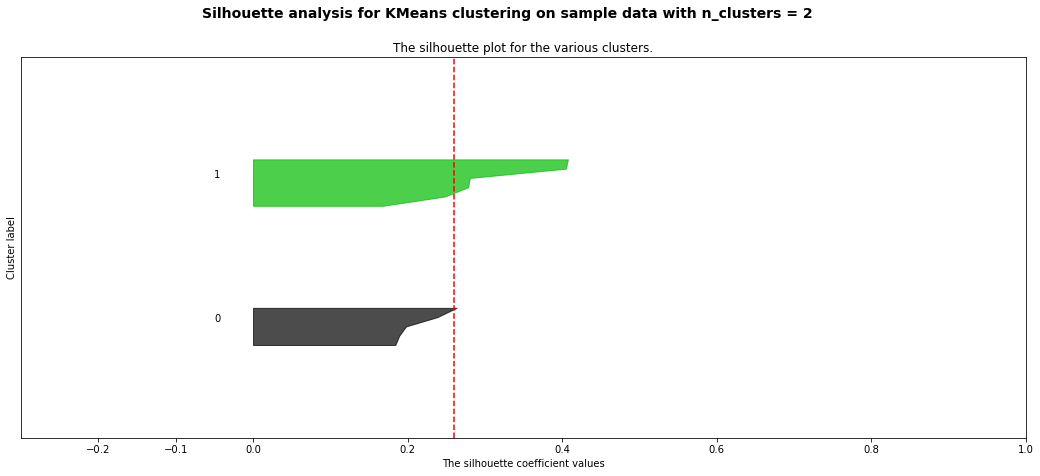

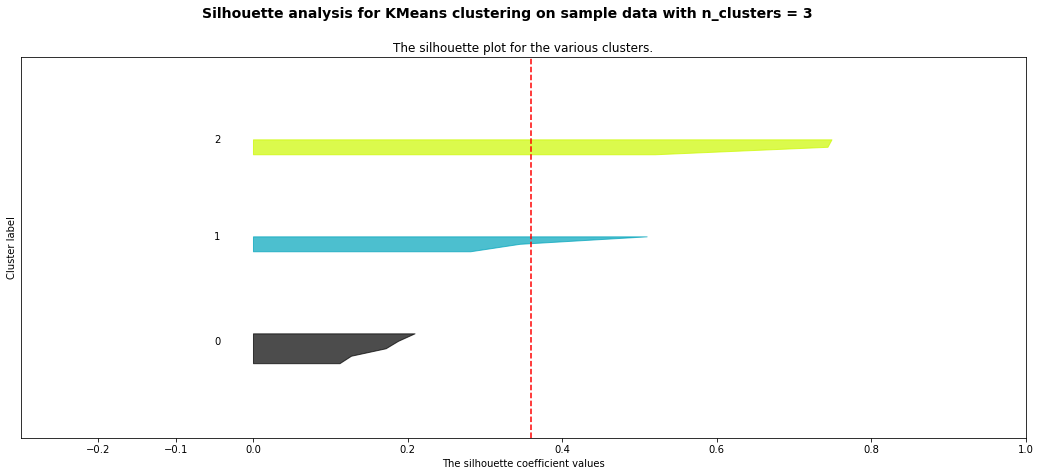

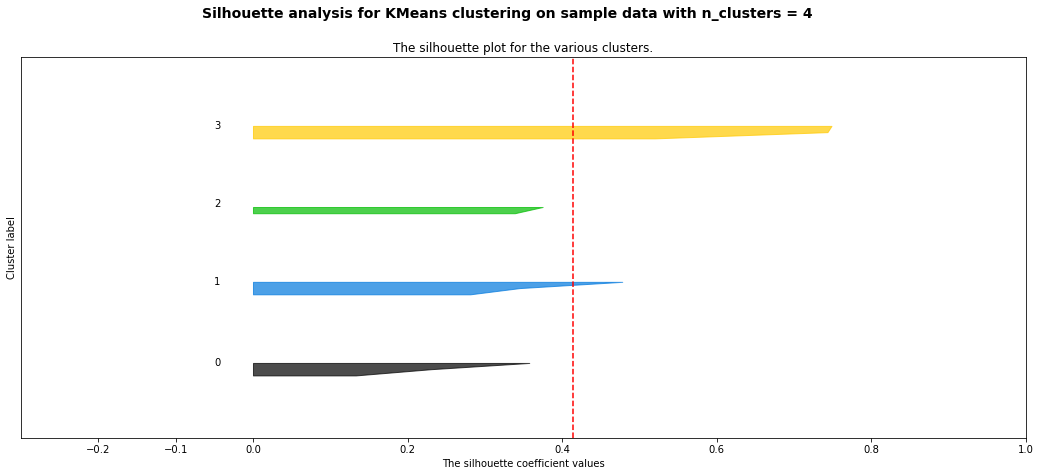

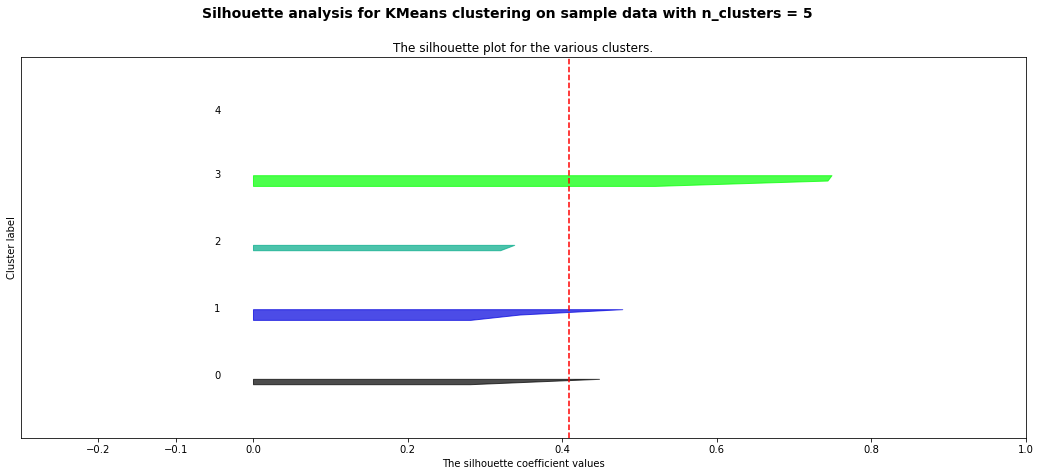

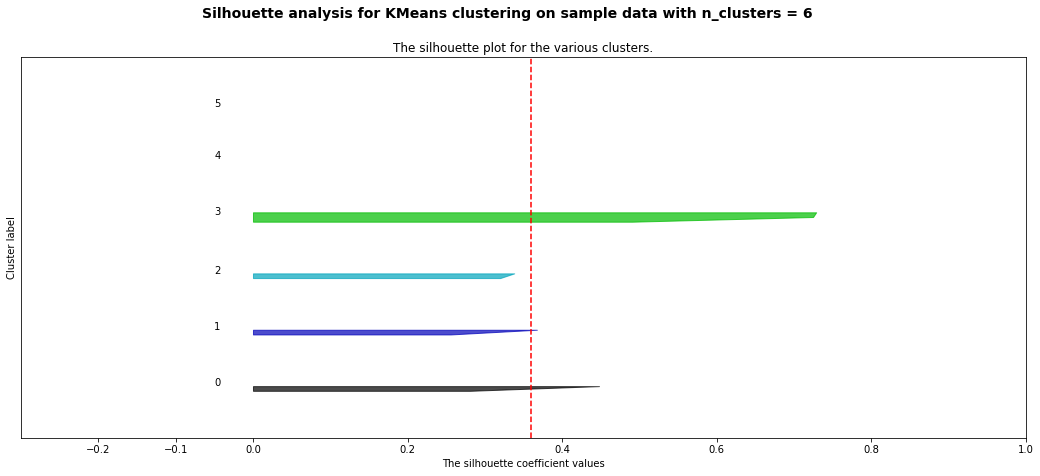

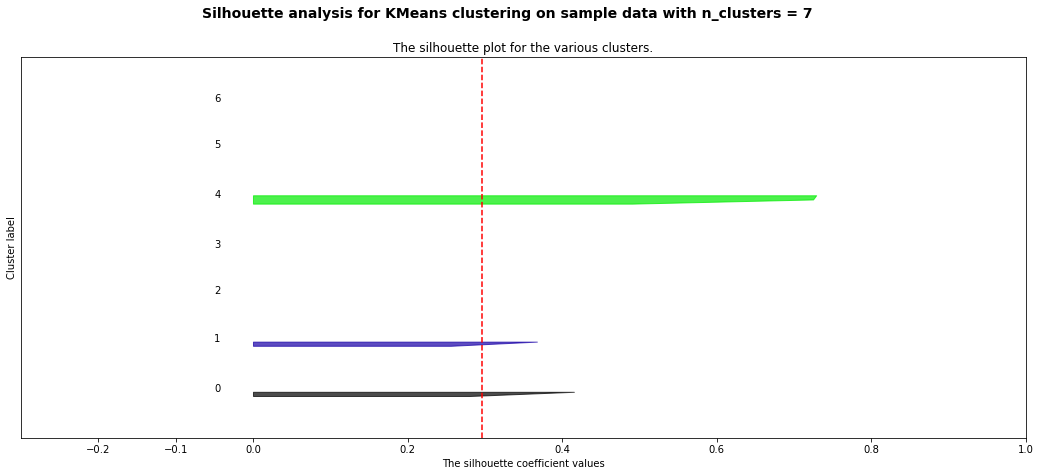

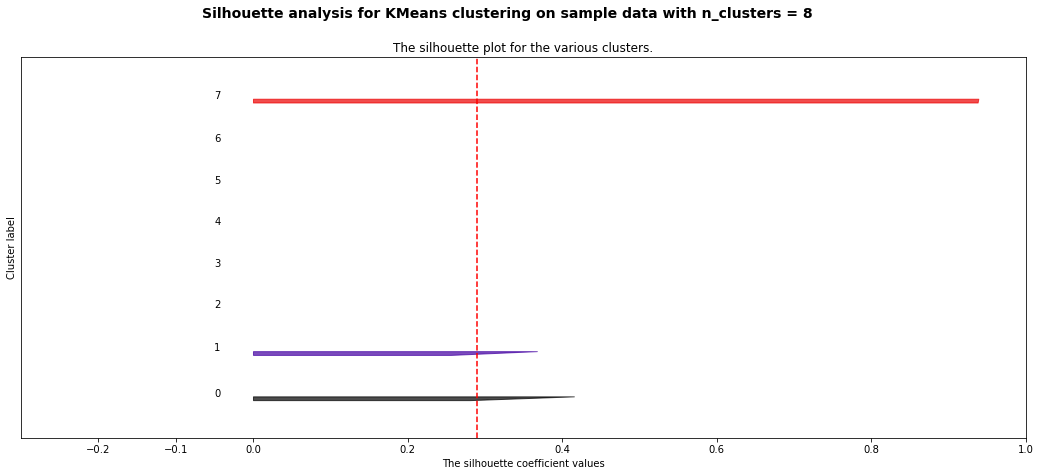

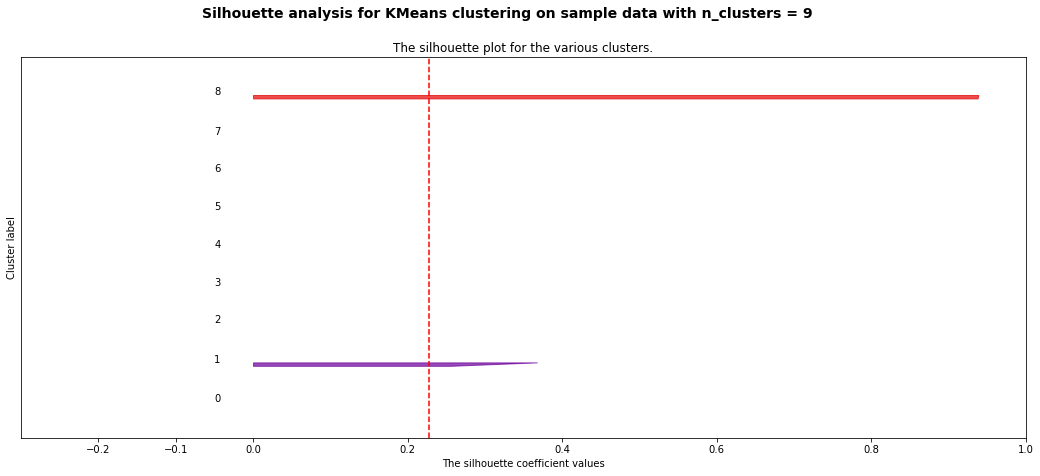

In [40]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(M_dis.columns) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    agg = hierachy_k(M_dis,n_clusters)
    cluster_labels = np.array([i[0] for i in agg])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(M_dis, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(M_dis, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.savefig(f"results/scenario_{s}/indepth_silhouette_analysis_k_{n_clusters}")
    

plt.show()